# Simulation 02 - Exercise 05

### 2020-03-05 Josep Fortiana

## Basic acceptance-rejection algorithm (with a candidate function)

A plain vanilla implementation of the basic acceptance-rejection algorithm. 

Code for generating a sequence of random numbers following a given probability distribution, with parameters:


1. `f` is the target pdf, 
2. `g` is the candidate pdf, 
3. `rg` is a function that generates random numbers following `g`. 
4. `c` is the constant such that $f(x)\leq c \cdot g(x)$ for all $x$.
5. `n` is the sequence length, meaning the total number of trials (accepted+rejected)

The function returns a list with `z`, the sequence of random numbers, and `Proportion` of accepted values.

You can take this code as a starting point. The function can be greatly improved both in efficiency and in functionality.

For instance it might be advisable to enter `na`, the desired number of accepted random numbers, instead of `n`, the total number of trials.

Avoiding the outer loop would be a good efficiency boost.

In [3]:
Accept.Reject<-function(f,g,rg,c,n=1.0e4){
    z<-rep(0,n) 
    N<-0
    for (i in 1:n){
        accept<-FALSE
        while (accept == FALSE){
            u <- runif(1)
            v <- rg(1)
            N<-N+1
            if (c*u <= f(v)/g(v)){
                z[i] <- v
                accept <- TRUE
                }
            }
        }
    Proportion<-n/N
    return(list(z=z,Proportion=Proportion))
    }

## Exercise 5 - Rayleigh random numbers from an exponential distribution

#### $\operatorname{Rayleigh}(\sigma)$ from $\operatorname{Exp}(\lambda)$


The $\operatorname{Rayleigh}(\sigma)$ distribution's pdf is:
$$
	f(x|\sigma)=\dfrac{x}{\sigma^{2}}\,\exp\{-\frac{x^{2}}{2\,\sigma^{2}}\},\quad x\geq 0.
$$ 


To generate RN from it by the accept-reject method we can use a candidate $\operatorname{Exp}(\lambda)$	distribution with pdf:

$$
	g(x|\lambda)=\lambda\,\exp\{-\lambda\,x\},\quad x\geq 0.
$$

The `extraDistr` package also contains the Rayleigh distribution (so a call to `rrayleigh()` does the job). Anyway, we will continue with the exercise for the sake of practicing and gaining insight. We can use `rrayleigh()` for comparison.

<img src="Rayleigh.0.jpg" alt="Rayleigh pdf" width="450"/>

#### (a)

Actually, RN $\sim\operatorname{Rayleigh}(\sigma)$ can be generated by the inverse cdf method (Exercise: do it).

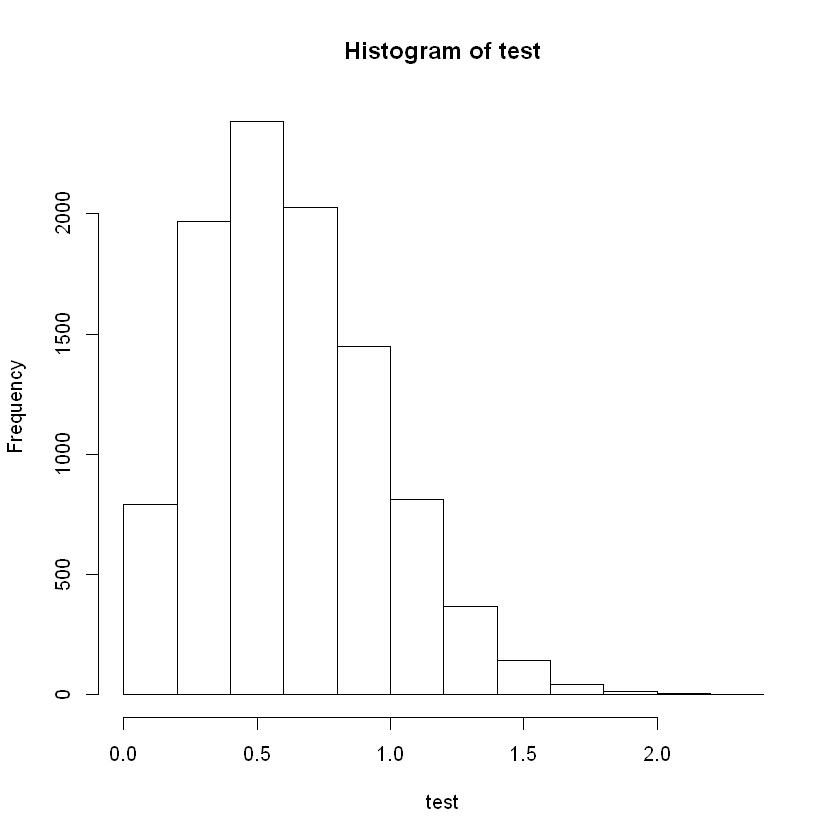

In [21]:
#
#    Insert here your code
#
rayleigh.quantile.build<-function(sigma){
    quantile<-function(F){sigma*(-2*log(1-F))**0.5}
}

sigma = 0.5
u = runif(10000)
rayleigh.quantile  = rayleigh.quantile.build(sigma)
test = rayleigh.quantile(u)
hist(test)


### (b)

With the acceptance-rejection method.

Given $\sigma>0$, find an upper bound  $R(\lambda)$ for the quotient:

$$
	r(x|\sigma,\lambda)=\dfrac{f(x|\sigma)}{g(x|\lambda)},\mskip20mu x>0,
$$

as a function of $\lambda>0$ as a parameter. Then verify that $R(\lambda)$ attains the minimum value $M=R(\lambda_{0})=2$ for $\lambda_{0}=\dfrac{1}{\sqrt{2}\,\sigma}$. 

Then launch an acceptance-rejection procedure for a $\operatorname{Rayleigh}\big(\sigma=\dfrac{1}{\sqrt{2}}\big)$ target pdf, with candidate pdf $\operatorname{Exp}(\lambda_{0})$, where $\lambda_{0}=\dfrac{1}{\sqrt{2}\,\sigma}=1$, $M=2$, checking that the acceptance rate is $\approx 1/M=0.5$.

_Hint: you may find it expedient to define $y=x/\sigma$ and $\alpha=\lambda\,\sigma$ to avoid unwieldy expressions._

### Exercise

Let us use first introduce a change of variables: 
$y = \dfrac{x}{\sigma}$ and $\alpha = \lambda \sigma$.

Let us find the minimum value of $R(\lambda) = r(x | \sigma, \lambda)$ that now that using the change of variables can be expressed as $R(\alpha) = \dfrac{y}{\alpha} \exp\left({-\dfrac{y^2}{2} + \alpha y}\right)$.

To find the minimum we need: $\dfrac{ d R(\alpha)}{d \lambda} =\dfrac{ d R(\alpha)}{d \lambda} \dfrac{ d \alpha}{d \lambda} = \dfrac{ d R(\alpha)}{d \lambda} \sigma  = y \exp \left({-\dfrac{-y^2}{2}} + \alpha y \right) \left(\dfrac{y}{\alpha} - \dfrac{1}{\alpha ^2} \right) = 0 $

and therefore we obtain: $y = \alpha ^{-1}$. Rewritting now $r(\alpha)$ as $r(y)$ we obtatin:

$r(y) = y^2 exp \left( -\dfrac{y^2}{2} + 1\right) $

Let us find now the minimum as function of $y$:

$\dfrac{d r(y)}{d y} = y \exp \left(  -\dfrac{y^2}{2} + 1\right)(2 - y^2) = 0$ 

The minimum is reached when $y=\sqrt{2}$, that is when $x = \sigma \sqrt{2}$ and $\lambda = \dfrac{1}{\sqrt{2} \sigma}$.

Using this value we obtain $r(y= \sqrt{2}) = 2$.


[1] "Percentage of area under the desired curve:"
[1] 0.5046937
[1] "1/M:"
[1] 0.5


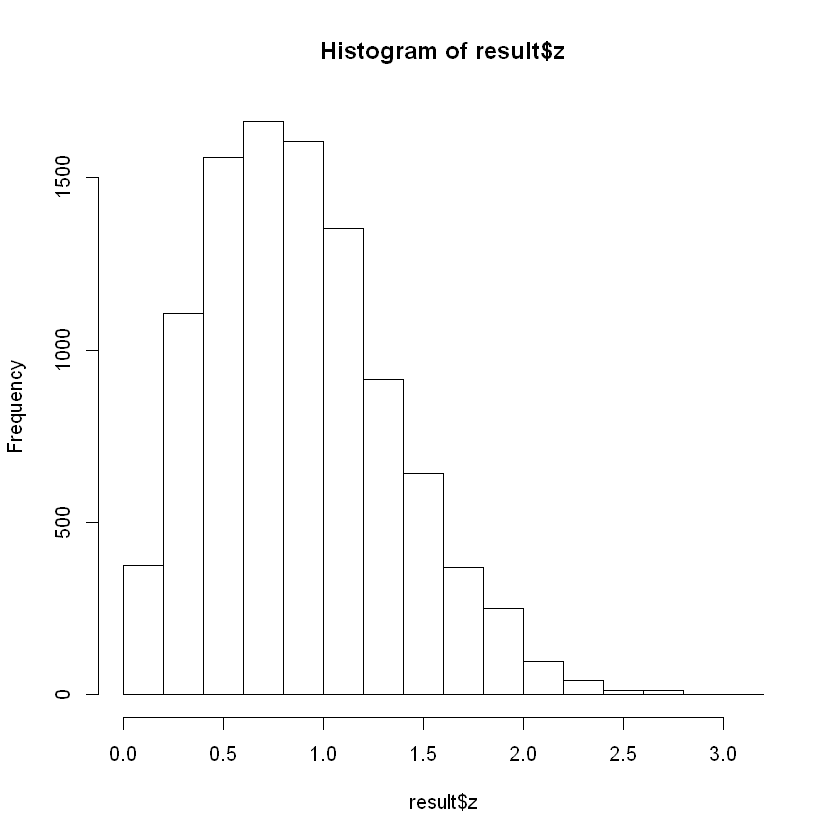

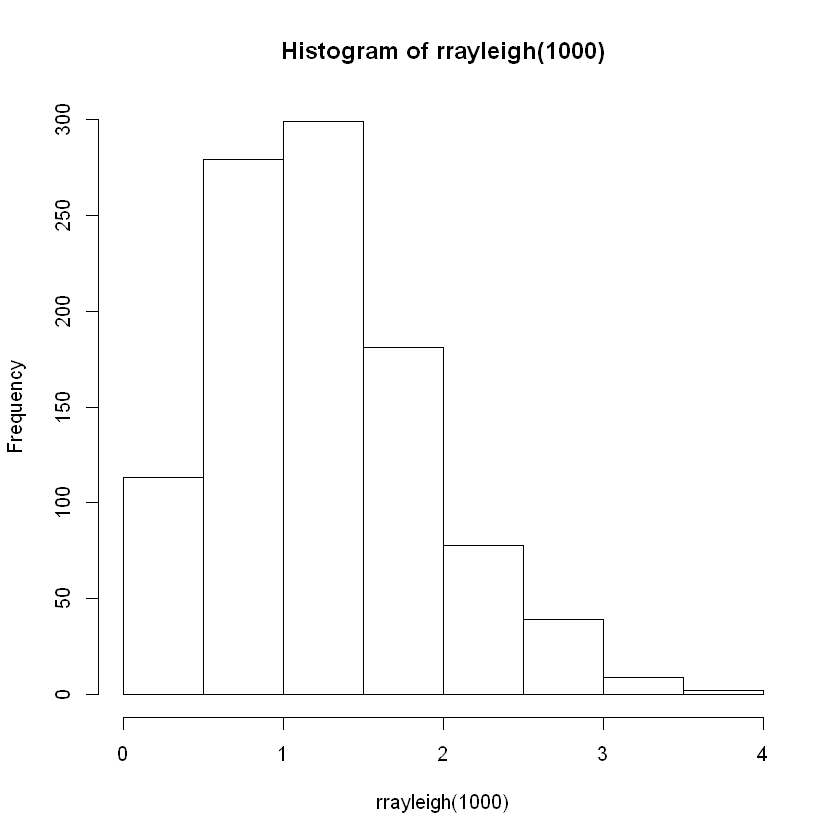

In [23]:
#
#    Insert here your code
#
#Rayleigh pdf builder
rayleigh.pdf.build<-function(sigma){
    rayleigh.pdf<-function(x){
       x* sigma**(-2) * exp(-x**2 * sigma**(-2) * 0.5)
    }
    rayleigh.pdf
}

#exponential pdf builder
exponential.pdf.build<-function(lambda){
    exponential.pdf<-function(x){
        lambda*exp(-lambda*x)
    }
}


#exponential quantile function builder
exponential.quantile.build<-function(lambda){
    exponential.quantile<-function(n){ 
        u<-runif(n)
#         print(u)
        exp.qtl<-function(F){-log(1-F)/lambda } 
        result<-exp.qtl(u)
#         print('result',result)
        return(result)
    }
}


lambda = 1
sigma = (2)**(-0.5)

f<-rayleigh.pdf.build(sigma)
g<-exponential.pdf.build(lambda)
# g<-function(x){0*x+1} #UNIFORM
rg<-exponential.quantile.build(lambda)
# rg<-runif  #UNIFORM
c<-2

result<-Accept.Reject(f,g,rg,c,n=1.0e4)

result.proportion <- result$Proportion
print('Percentage of area under the desired curve:')
print(result.proportion)
print('1/M:')
inverse.c <- 1/c
print(inverse.c)

hist(result$z)
require(extraDistr)
hist(rrayleigh(1000))